In [1]:
import os
os.environ['DYLD_LIBRARY_PATH'] = '/Users/nasedkn/Software/MultiNest/lib'
import species
import requests
import urllib
import numpy as np
import matplotlib.pyplot as plt 
from glob import glob
from spectres import spectres
from astropy.io import fits
species.SpeciesInit()
database = species.Database()
database.add_photometry('vlm-plx')



species v0.6.0
Working folder: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks
Configuration settings:
   - Database: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks/species_database.hdf5
   - Data folder: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks/data
   - Interpolation method: linear
   - Magnitude of Vega: 0.03
Adding Database of Ultracool Parallaxes... [DONE]


In [19]:
planet_name = "HR 8799 c"
current_model = 'exo-rem'
tag = "_fitcorr_newales_fixedfeh"


In [12]:
# photometry for planets b, c, d, e, u, f (rows)
# filters F1065C F1140C F1550C F2100W (columns)

# HR 8799 b
#*_,F1065C,F1065C_err = "JWST/MIRI.F1065C", 10.022673, 11.157748, 3.673535154104630530e-18, 1.21141972186095475e-19
#*_,F1140C,F1140C_err = "JWST/MIRI.F1140C", 10.735790, 11.959395, 2.541982966633967498e-18, 1.66070551450510668e-19
#*_,F1550C,F1550C_err = "JWST/MIRI.F1550C", 14.941367, 16.155633, 8.395307415791850058e-19, 1.882856941907763912e-19

# HR 8799 c
#*_,F1065C,F1065C_err ="JWST/MIRI.F1065C", 10.022673, 11.157748, 3.492804970011301962e-18, 8.13206902996347610e-19
#*_,F1140C,F1140C_err="JWST/MIRI.F1140C", 10.735790, 11.959395, 4.689149971781048934e-18, 7.56136511820580752e-19
#*_,F1550C,F1550C_err="JWST/MIRI.F1550C", 14.6, 16.4, 3.673535154104630530e-18, 7.52253157415636198e-19

# HR 8799 d
#*_,F1065C,F1065C_err="JWST/MIRI.F1065C", 10.022673, 11.157748, 6.172403037026256e-18, 8.132069029963476e-19
#*_,F1140C,F1140C_err="JWST/MIRI.F1140C", 10.735790, 11.959395, 4.6891499717810489e-18, 7.5613651182058e-19
#*_,F1550C,F1550C_err="JWST/MIRI.F1550C", 14.6, 16.4, 3.673535154104630e-18, 7.5225315741563e-19

# HR 8799 e
#*_,F1065C,F1065C_err="JWST/MIRI.F1065C", 10.022673, 11.157748, 9.413539747215107102e-18, 2.22281001690975886e-18
#*_,F1140C,F1140C_err="JWST/MIRI.F1140C", 10.735790, 11.959395, 7.144848753546767932e-18, 1.513680671216924430e-18
#*_,F1550C,F1550C_err="JWST/MIRI.F1550C", 14.941367, 16.155633, 8.164133950873428973e-18, 2.984784130025809667e-18

#F1065C_synphot = species.SyntheticPhotometry('JWST/MIRI.F1065C')
#F1140C_synphot = species.SyntheticPhotometry('JWST/MIRI.F1140C')
#F1550C_synphot = species.SyntheticPhotometry('JWST/MIRI.F1550C')

#F1065C_app_mag, abs_mag = F1065C_synphot.flux_to_magnitude(F1065C, error=F1065C_err, distance=(41.2925, 0.25))
#F1140C_app_mag, abs_mag = F1140C_synphot.flux_to_magnitude(F1140C, error=F1140C_err, distance=(41.2925, 0.25))
#F1550C_app_mag, abs_mag = F1550C_synphot.flux_to_magnitude(F1550C, error=F1550C_err, distance=(41.2925, 0.25))
#Apparent magnitude = 16.05 +/- 0.30
#Flux (W m-2 um-1) = 8.87e-18 +/- 2.48e-18
##print(f"'JWST/MIRI.F1065C': [\n{F1065C_app_mag[0]},\n{F1065C_app_mag[1]}\n],")
#print(f"'JWST/MIRI.F1140C': [\n{F1140C_app_mag[0]},\n{F1140C_app_mag[1]}\n],")
#print(f"'JWST/MIRI.F1550C': [\n{F1550C_app_mag[0]},\n{F1550C_app_mag[1]}\n]")
print(database.available_models())




Available model grids:
   - AMES-Cond:
      - Label = ames-cond
      - Model parameters: ['teff', 'logg']
      - Teff range (K): [100, 6600]
      - Wavelength range (um): [0.5, 40]
      - Resolution lambda/Dlambda: 4000
      - File size: 150 MB

   - AMES-Dusty:
      - Label = ames-dusty
      - Model parameters: ['teff', 'logg']
      - Teff range (K): [500, 4000]
      - Wavelength range (um): [0.5, 40]
      - Resolution lambda/Dlambda: 4000
      - File size: 58 MB

   - ATMO:
      - Label = atmo
      - Model parameters: ['teff', 'logg']
      - Teff range (K): [200, 3000]
      - Wavelength range (um): [0.4, 6000]
      - Resolution lambda/Dlambda: 10000
      - File size: 425 MB
      - Reference: Phillips et al. (2020)
      - URL: https://ui.adsabs.harvard.edu/abs/2020A%26A...637A..38P/abstract

   - ATMO CEQ:
      - Label = atmo-ceq
      - Model parameters: ['teff', 'logg']
      - Teff range (K): [200, 3000]
      - Wavelength range (um): [0.2, 6000]
      - Resolu

In [9]:
diamondback_dir = "/Users/nasedkin/data/sonora/diamondback/"
#diamondback_dir_0 = "/Users/nasedkin/data/sonora/diamondback/diamondback_beta_spectra_m0.0/"
#diamondback_dir_super = "/Users/nasedkin/data/sonora/diamondback/diamondback_beta_spectra_m+0.5/"

#database.add_model(model='drift-phoenix', teff_range=(700., 1700.))
#database.add_model(model='exo-rem', teff_range=(700., 1600.))
#database.add_model(model='exo-rem-highres', teff_range=(900., 1400.))

database.add_model(model='petitcode-cool-cloudy', teff_range=(700., 1700.))
#database.add_model(model='petitcode-hot-cloudy', teff_range=(700., 1700.))
#database.add_model(model='saumon2008-cloudy', teff_range=(700., 1700.))
#database.add_model(model='saumon2008-clear', teff_range=(700., 1700.))
#database.add_model(model='sonora-bobcat', teff_range=(700., 1700.))
#database.add_model(model='sonora-bobcat-co', teff_range=(700., 1700.))
#database.add_model(model='sonora-cholla', teff_range=(700., 1700.))

#database.add_model(model='petrus2023', teff_range=(700., 1700.))
#database.add_model(model='petrus2023', teff_range=(700., 1700.))

"""database.add_custom_model(model="diamondback",
                          data_path = diamondback_dir,
                          parameters = ["teff","logg","feh","fsed"],
                          wavel_range=(0.5,25.0), 
                          spec_res=500,
                          teff_range=(900,1800),        
                          skiprows = 3,
                          scale_factor = 1e-6)"""

Model information: log(Kzz) = 7.5
Please cite Mollière et al. (2015) when using petitCODE cool cloudy in a publication
Reference URL: https://ui.adsabs.harvard.edu/abs/2015ApJ...813...47M/abstract
Wavelength range (um) = 0.1 - 250
Spectral resolution = 1000
Teff range (K) = 700.0 - 1700.0
Adding petitCODE cool cloudy model spectra... [DONE]                                                              
Grid points stored in the database:
   - Teff = [700. 750. 800. 850.]
   - log(g) = [3.  3.5 4.  4.5 5. ]
   - [Fe/H] = [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4]
   - f_sed = [0.5 1.  1.5 2.  3. ]
Number of grid points per parameter:
   - teff: 4
   - logg: 5
   - feh: 8
   - fsed: 5
Fix missing grid points with a linear interpolation:
   - teff = 750.0, logg = 3.0, feh = 0.0, fsed = 3.0
   - teff = 750.0, logg = 3.0, feh = 0.2, fsed = 3.0
   - teff = 750.0, logg = 3.0, feh = 0.4, fsed = 3.0
   - teff = 750.0, logg = 3.0, feh = 0.6, fsed = 3.0
   - teff = 750.0, logg = 3.0, feh = 0.8, fsed = 3.0


/Users/nasedkin/python-packages/species/species/util/data_util.py:379: RuntimeWarning: divide by zero encountered in log10
  flux = np.log10(flux)


Could not interpolate 40 grid points so storing zeros instead. [WARNING]
The grid points that are missing:
   - teff = 850.0, logg = 3.0, feh = 0.0, fsed = 3.0
   - teff = 850.0, logg = 3.0, feh = 0.2, fsed = 3.0
   - teff = 850.0, logg = 3.0, feh = 0.4, fsed = 3.0
   - teff = 850.0, logg = 3.0, feh = 0.6, fsed = 3.0
   - teff = 850.0, logg = 3.0, feh = 0.8, fsed = 3.0
   - teff = 850.0, logg = 3.0, feh = 1.0, fsed = 3.0
   - teff = 850.0, logg = 3.0, feh = 1.2, fsed = 3.0
   - teff = 850.0, logg = 3.0, feh = 1.4, fsed = 3.0
   - teff = 850.0, logg = 3.5, feh = 0.0, fsed = 3.0
   - teff = 850.0, logg = 3.5, feh = 0.2, fsed = 3.0
   - teff = 850.0, logg = 3.5, feh = 0.4, fsed = 3.0
   - teff = 850.0, logg = 3.5, feh = 0.6, fsed = 3.0
   - teff = 850.0, logg = 3.5, feh = 0.8, fsed = 3.0
   - teff = 850.0, logg = 3.5, feh = 1.0, fsed = 3.0
   - teff = 850.0, logg = 3.5, feh = 1.2, fsed = 3.0
   - teff = 850.0, logg = 3.5, feh = 1.4, fsed = 3.0
   - teff = 850.0, logg = 4.0, feh = 0.0, fse

'database.add_custom_model(model="diamondback",\n                          data_path = diamondback_dir,\n                          parameters = ["teff","logg","feh","fsed"],\n                          wavel_range=(0.5,25.0), \n                          spec_res=500,\n                          teff_range=(900,1800),        \n                          skiprows = 3,\n                          scale_factor = 1e-6)'

In [10]:
database.add_companion(name=planet_name)
data_dir = "observations/"
output_dir = data_dir + "distance_normalised_observations/"
distance_scale = (10/41.2925)**2

#HR 8799 b
gravity_file = "HR8799b_GRAVITY.fits"
osiris_file = 'hr8799b_osiris_hk_2011.txt'



#HR 8799 c
#gravity_file = "HR8799c_GRAVITY.fits"
#sphere_file = "PACO_FLASSEUR_HR8799c_2016.txt"
#gpi_file = "HR8799c_GPIH_KLIP_2023_spectrum.fits"
#charis_file = "HR8799c_CHARIS_average.dat"
#ales_file = "ALES_HR8799c_spectrum.fits"
#ales_file = "HR8799c_ALES_TRAP2023.txt"

#HR 8799 d
#gravity_file = "HR8799d_GRAVITY.fits"
#sphere_file = "HR8799d_SPHEREYJH_KLIP_2023_spectrum.fits"
#gpi_file = "HR8799d_GPIH_KLIP_2023_spectrum.fits"
#charis_file = "HR8799d_CHARIS_average.dat"
#ales_file = "ALES_HR8799d_spectrum.fits"
#ales_file = "HR8799d_ALES_TRAP2023.txt"

#HR 8799 e
gravity_file = "HR8799e_GRAVITY.fits"
sphere_file = "HR8799e_SPHEREYJH_KLIP_2023_spectrum.fits"
gpi_file = "HR8799e_GPIH_KLIP_2023_spectrum.fits"
charis_file = "HR8799e_CHARIS_average.dat"
#ales_file = "ALES_HR8799e_spectrum.fits"
ales_file = "HR8799e_ALES_TRAP2023.txt"



#from spectres import spectres
#smfile = "/Users/nasedkin/data/HR8799/hr8799_star_spec_fullfit_.dat"
#sm = np.genfromtxt(smfile).T
#print(sm.shape)
#ales_file_new = "/Users/nasedkin/Documents/HR8799/ALES/LiuTRAP/trap_HR_8799.txt"
#spec = fits.open(data_dir + ales_file)["SPECTRUM"].data
#sphw = spec["WAVELENGTH"]
#sphf = spec["FLUX"]
#sphe = np.sqrt(np.diagonal(spec["COVARIANCE"]))
#opened_file = np.loadtxt(f"{ales_file_new}", unpack = True)
#sphw = opened_file[0]
#sphf,sphe = opened_file[3],opened_file[4]
#nsm = spectres(sphw,sm[0],sm[1])
#flux = 3e-12*sphf*1e-3/(sphw)**2 * distance_scale
#flux_error = 3e-12*sphe*1e-3/(sphw)**2* distance_scale
#plt.errorbar(sphw,sphf*nsm,yerr=sphe*nsm)
#fnu = spec["FLUX"] 
#fnuerr = np.sqrt(np.diagonal(spec["COVARIANCE"])) 
#plt.errorbar(spec["WAVELENGTH"],fnu,yerr=fnuerr)

#stack = np.column_stack([sphw,
#                         sphf*nsm,
#                         sphe*nsm])
#print(np.mean(sphw[:-1]/np.diff(sphw)))
#np.savetxt(output_dir + f"HR8799d_ALES_TRAP2023_realdist.txt", stack)

Getting SPHERE_YJH spectrum of HR 8799 e... [DONE]
Please cite Zurlo et al. 2016, A&A, 587, 57 when making use of this spectrum in a publication
Adding object: HR 8799 e
   - Parallax (mas) = 24.46 +/- 0.05
   - Paranal/SPHERE.IRDIS_B_J:
      - Mean wavelength (um) = 1.5519e+01
      - Apparent magnitude = 18.40 +/- 0.21
      - Flux (W m-2 um-1) = 1.37e-16 +/- 2.68e-17
   - Paranal/SPHERE.IRDIS_D_H23_2:
      - Mean wavelength (um) = 1.5519e+01
      - Apparent magnitude = 16.91 +/- 0.20
      - Flux (W m-2 um-1) = 2.22e-16 +/- 4.11e-17
   - Paranal/SPHERE.IRDIS_D_H23_3:
      - Mean wavelength (um) = 1.5519e+01
      - Apparent magnitude = 16.68 +/- 0.21
      - Flux (W m-2 um-1) = 2.32e-16 +/- 4.52e-17
   - Keck/NIRC2.Ks:
      - Mean wavelength (um) = 1.5519e+01
      - Apparent magnitude = 15.91 +/- 0.22
      - Flux (W m-2 um-1) = 1.92e-16 +/- 3.93e-17
   - Paranal/SPHERE.IRDIS_D_K12_1:
      - Mean wavelength (um) = 1.5519e+01
      - Apparent magnitude = 16.12 +/- 0.10
      -

In [11]:
"""database.add_object(planet_name,
                    parallax=(24.462,0.0455),
                    app_mag=None,
                    flux_density=None,
                    # {name: (spectrum, covariance, resolution)}
                    spectrum={'GRAVITY': (f'{data_dir}{gravity_file}', f'{data_dir}{gravity_file}', 500.),
                              'OSIRIS': (f'{output_dir}hr8799b_osiris_hk_2011_flambda_realdist.txt', None, 141.0)},
                    deredden=None)"""
#HR 8799c
database.add_object(planet_name,
                    parallax=(24.462,0.0455),
                    app_mag=None,
                    flux_density=None,
                    # {name: (spectrum, covariance, resolution)}
                    spectrum={'GRAVITY': (f'{data_dir}{gravity_file}', f'{data_dir}{gravity_file}', 500.),
                              'SPHERE': (f'{output_dir}{sphere_file.split(".")[0]}_realdist.txt', None, 30.),
                              #'SPHERE': (f'{data_dir}PACO_FLASSEUR_HR8799c_2016.txt', None, 30.),
                              'CHARIS': (f'{output_dir}{charis_file.split(".")[0]}_realdist.txt', None, 16.),
                              'GPIH': (f'{output_dir}{gpi_file.split(".")[0]}_realdist.txt', None, 45.),
                              'ALES': (f'{output_dir}{ales_file.split(".")[0]}_realdist.txt', None, 40.)},
                    deredden=None)






Adding object: HR 8799 e
   - Parallax (mas) = 24.46 +/- 0.05
   - GRAVITY spectrum:
      - Object: Unknown
      - Database tag: GRAVITY
      - Filename: observations/HR8799e_GRAVITY.fits
      - Data shape: (233, 3)
      - Wavelength range (um): 1.97 - 2.48
      - Mean flux (W m-2 um-1): 1.32e-16
      - Mean error (W m-2 um-1): 1.57e-17
   - Spectrum:
      - Database tag: SPHERE
      - Filename: observations/distance_normalised_observations/HR8799e_SPHEREYJH_KLIP_2023_spectrum_realdist.txt
      - Data shape: (39, 3)
      - Wavelength range (um): 0.95 - 1.68
      - Mean flux (W m-2 um-1): 9.47e-17
      - Mean error (W m-2 um-1): 2.29e-17
   - Spectrum:
      - Database tag: CHARIS
      - Filename: observations/distance_normalised_observations/HR8799e_CHARIS_average_realdist.txt
      - Data shape: (22, 3)
      - Wavelength range (um): 1.16 - 2.37
      - Mean flux (W m-2 um-1): 9.78e-17
      - Mean error (W m-2 um-1): 3.46e-17
   - Spectrum:
      - Database tag: GPIH
  

Available photometric data for HR 8799 c:
   - JWST/MIRI.F1065C
   - JWST/MIRI.F1140C
   - JWST/MIRI.F1550C
   - Keck/NIRC2.H
   - Keck/NIRC2.Ks
   - Keck/NIRC2.Ms
   - Paranal/NACO.Lp
   - Paranal/NACO.NB405
   - Paranal/SPHERE.IRDIS_B_J
   - Paranal/SPHERE.IRDIS_D_H23_2
   - Paranal/SPHERE.IRDIS_D_H23_3
   - Paranal/SPHERE.IRDIS_D_K12_1
   - Paranal/SPHERE.IRDIS_D_K12_2
Getting object: HR 8799 c... [DONE]
JWST/MIRI.F1065C
0.5682813384829153
JWST/MIRI.F1140C
0.586415316797849
JWST/MIRI.F1550C
0.7348086892120911
Keck/NIRC2.Ms
0.23992796852837106
Paranal/NACO.Lp
0.6276348582389186
Paranal/NACO.NB405
0.06124789557254662
Paranal/SPHERE.IRDIS_B_J
0.24338957032233965
Paranal/SPHERE.IRDIS_D_H23_2
0.05333096018675132
Paranal/SPHERE.IRDIS_D_H23_3
0.055530714769082445
Paranal/SPHERE.IRDIS_D_K12_1
0.10240523658303102
Paranal/SPHERE.IRDIS_D_K12_2
0.11039405718538875
Plotting spectrum...

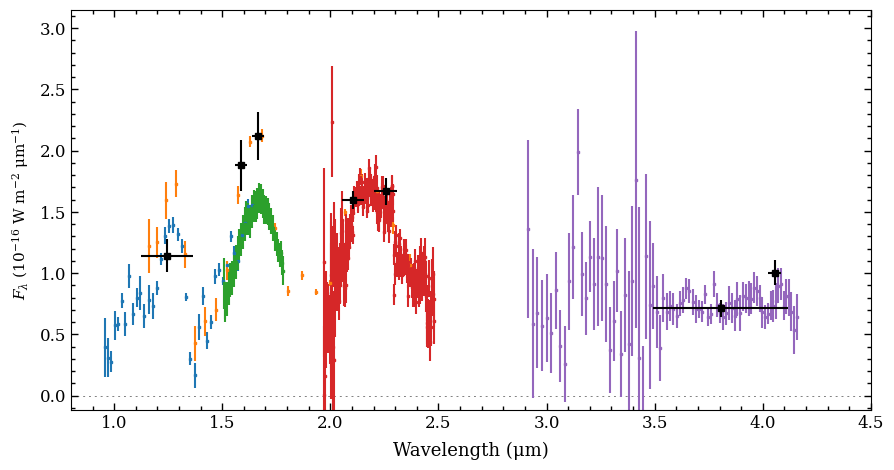

 [DONE]


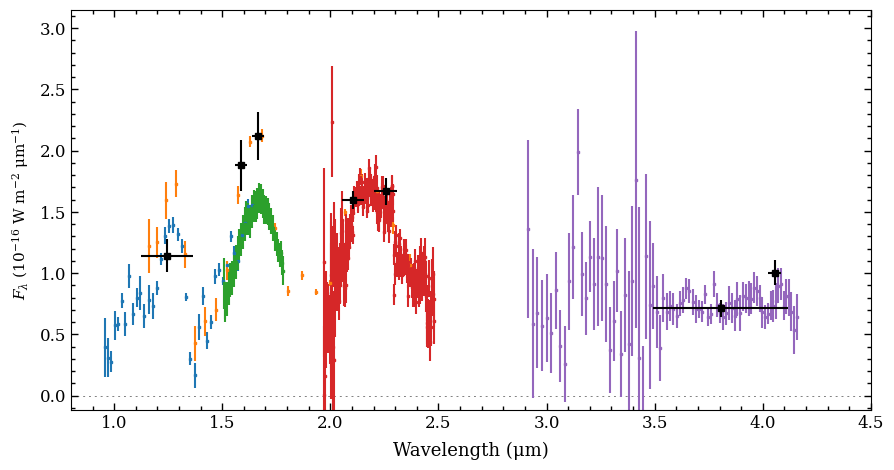

In [20]:
read_obj = species.ReadObject(planet_name)
filter_list = read_obj.list_filters()
filter_list.pop(filter_list.index('Keck/NIRC2.H'))
filter_list.pop(filter_list.index('Keck/NIRC2.Ks'))
#filter_list.pop(filter_list.index('JWST/MIRI.F1065C'))
#filter_list.pop(filter_list.index('JWST/MIRI.F1140C'))
#filter_list.pop(filter_list.index('JWST/MIRI.F1550C'))
objectbox = database.get_object(object_name=planet_name,
                                inc_phot=filter_list,
                                inc_spec=True)
from species.read import read_filter
for filter in objectbox.filters:
        print(filter)
        print(read_filter.ReadFilter(filter).filter_fwhm())
species.plot_spectrum(boxes=[objectbox],
                      filters=None,
                      residuals=None,
                      xlim=(0.8, 4.5),
                      ylim=(-1.15e-17, 3.15e-16),
                      ylim_res=(-7., 7.),
                      scale=('linear', 'linear'),
                      offset=(-0.08, -0.05),
                      legend=[{'loc': 'upper left', 'frameon': False, 'fontsize': 11.},
                              {'loc': 'upper right', 'frameon': False, 'fontsize': 12.}],
                      figsize=(8., 4.),
                      quantity='flux density',
                      output=None)

In [21]:
fit = species.FitModel(object_name=planet_name,
                       model=current_model,
                       bounds={#'teff': (1000., 1600.),
                               'radius': (0.5, 2.),
                               'feh': (0.0, 0.0)},
                               #'GPIH': ((0.1, 5.),None)},
                       inc_phot=filter_list,
                       inc_spec=True,
                       fit_corr=["SPHERE","GPIH","CHARIS","ALES"])
"""fit = species.FitModel(object_name=planet_name,
                       model=current_model,
                       bounds={#'teff': (1000., 1600.),
                               'radius': (0.5, 2.),
                               'OSIRIS': ((0.1, 5.),None)},
                               #'GPIH': ((0.1, 5.),None)},
                       inc_phot=filter_list,
                       inc_spec=True,
                       fit_corr=["OSIRIS"])"""

Getting object: HR 8799 c... [DONE]
Interpolating JWST/MIRI.F1065C... [DONE]
Interpolating JWST/MIRI.F1140C... [DONE]
Interpolating JWST/MIRI.F1550C... [DONE]
Interpolating Keck/NIRC2.Ms... [DONE]
Interpolating Paranal/NACO.Lp... [DONE]
Interpolating Paranal/NACO.NB405... [DONE]
Interpolating Paranal/SPHERE.IRDIS_B_J... [DONE]
Interpolating Paranal/SPHERE.IRDIS_D_H23_2... [DONE]
Interpolating Paranal/SPHERE.IRDIS_D_H23_3... [DONE]
Interpolating Paranal/SPHERE.IRDIS_D_K12_1... [DONE]
Interpolating Paranal/SPHERE.IRDIS_D_K12_2... [DONE]
Interpolating ALES... [DONE]
Interpolating CHARIS... [DONE]
Interpolating GPIH... [DONE]
Interpolating GRAVITY... [DONE]
Interpolating SPHERE... [DONE]
Fixing 1 parameters:
   - feh = 0.0
Fitting 13 parameters:
   - teff
   - logg
   - c_o_ratio
   - radius
   - parallax
   - corr_len_ALES
   - corr_amp_ALES
   - corr_len_CHARIS
   - corr_amp_CHARIS
   - corr_len_GPIH
   - corr_amp_GPIH
   - corr_len_SPHERE
   - corr_amp_SPHERE
Prior boundaries:
   - radi

'fit = species.FitModel(object_name=planet_name,\n                       model=current_model,\n                       bounds={#\'teff\': (1000., 1600.),\n                               \'radius\': (0.5, 2.),\n                               \'OSIRIS\': ((0.1, 5.),None)},\n                               #\'GPIH\': ((0.1, 5.),None)},\n                       inc_phot=filter_list,\n                       inc_spec=True,\n                       fit_corr=["OSIRIS"])'

In [22]:
fit.run_multinest(tag=f'{planet_name}_{current_model}{tag}',
                  n_live_points=400,
                  output=f'multinest/{planet_name}_{current_model}{tag}',
                  prior={'mass': (7.6, 0.9)})
#b (5.8, 0.4)
#c (7.7, 0.7)
#d (9.2, 0.2)
#e (7.6, 0.9)

Running nested sampling with MultiNest...
 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =   13
 *****************************************************


/Users/nasedkin/anaconda3/envs/species/lib/python3.10/site-packages/pymultinest/run.py:208: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  nargs = len(inspect.getargspec(LogLikelihood).args) - inspect.ismethod(LogLikelihood)


 ln(ev)=   15388.913194248202      +/-  0.26927093826803017     
 Total Likelihood Evaluations:       257786
 Sampling finished. Exiting MultiNest
  analysing data from multinest/HR 8799 c_exo-rem_fitcorr_newales_fixedfeh.txt
Nested sampling global log-evidence: 15388.91 +/- 0.27
Nested importance sampling global log-evidence: 15384.84 +/- 0.02
Sample with the highest likelihood:
   - Log-likelihood = 15422.86
   - teff = 1090.30
   - logg = 4.00
   - c_o_ratio = 0.21
   - radius = 1.18
   - parallax = 24.53
   - corr_len_ALES = -0.80
   - corr_amp_ALES = 0.56
   - corr_len_CHARIS = -0.03
   - corr_amp_CHARIS = 0.41
   - corr_len_GPIH = -1.44
   - corr_amp_GPIH = 0.81
   - corr_len_SPHERE = -1.28
   - corr_amp_SPHERE = 0.62
Integrated autocorrelation time:
   - teff: 1.94
   - logg: 1.14
   - c_o_ratio: 2.13
   - radius: 1.93
   - parallax: 1.22
   - corr_len_ALES: 1.36
   - corr_amp_ALES: 1.10
   - corr_len_CHARIS: 3.12
   - corr_amp_CHARIS: 1.12
   - corr_len_GPIH: 1.38
   - corr_amp

Getting MCMC spectra:   0%|          | 0/60 [00:00<?, ?it/s]

Median sample:
   - teff = 1.09e+03
   - logg = 4.00e+00
   - c_o_ratio = 2.19e-01
   - radius = 1.18e+00
   - parallax = 2.45e+01
   - corr_len_ALES = -7.95e-01
   - corr_amp_ALES = 5.32e-01
   - corr_len_CHARIS = -7.89e-02
   - corr_amp_CHARIS = 4.12e-01
   - corr_len_GPIH = -1.42e+00
   - corr_amp_GPIH = 7.77e-01
   - corr_len_SPHERE = -1.35e+00
   - corr_amp_SPHERE = 6.20e-01
   - feh = 0.00e+00
Maximum posterior sample:
   - teff = 1.09e+03
   - logg = 4.00e+00
   - c_o_ratio = 2.14e-01
   - radius = 1.18e+00
   - parallax = 2.45e+01
   - corr_len_ALES = -8.01e-01
   - corr_amp_ALES = 5.64e-01
   - corr_len_CHARIS = -3.47e-02
   - corr_amp_CHARIS = 4.12e-01
   - corr_len_GPIH = -1.44e+00
   - corr_amp_GPIH = 8.15e-01
   - corr_len_SPHERE = -1.28e+00
   - corr_amp_SPHERE = 6.22e-01
   - feh = 0.00e+00
Plotting the posterior: plots/HR 8799 c_exo-rem_fitcorr_newales_fixedfeh_corner... [DONE]


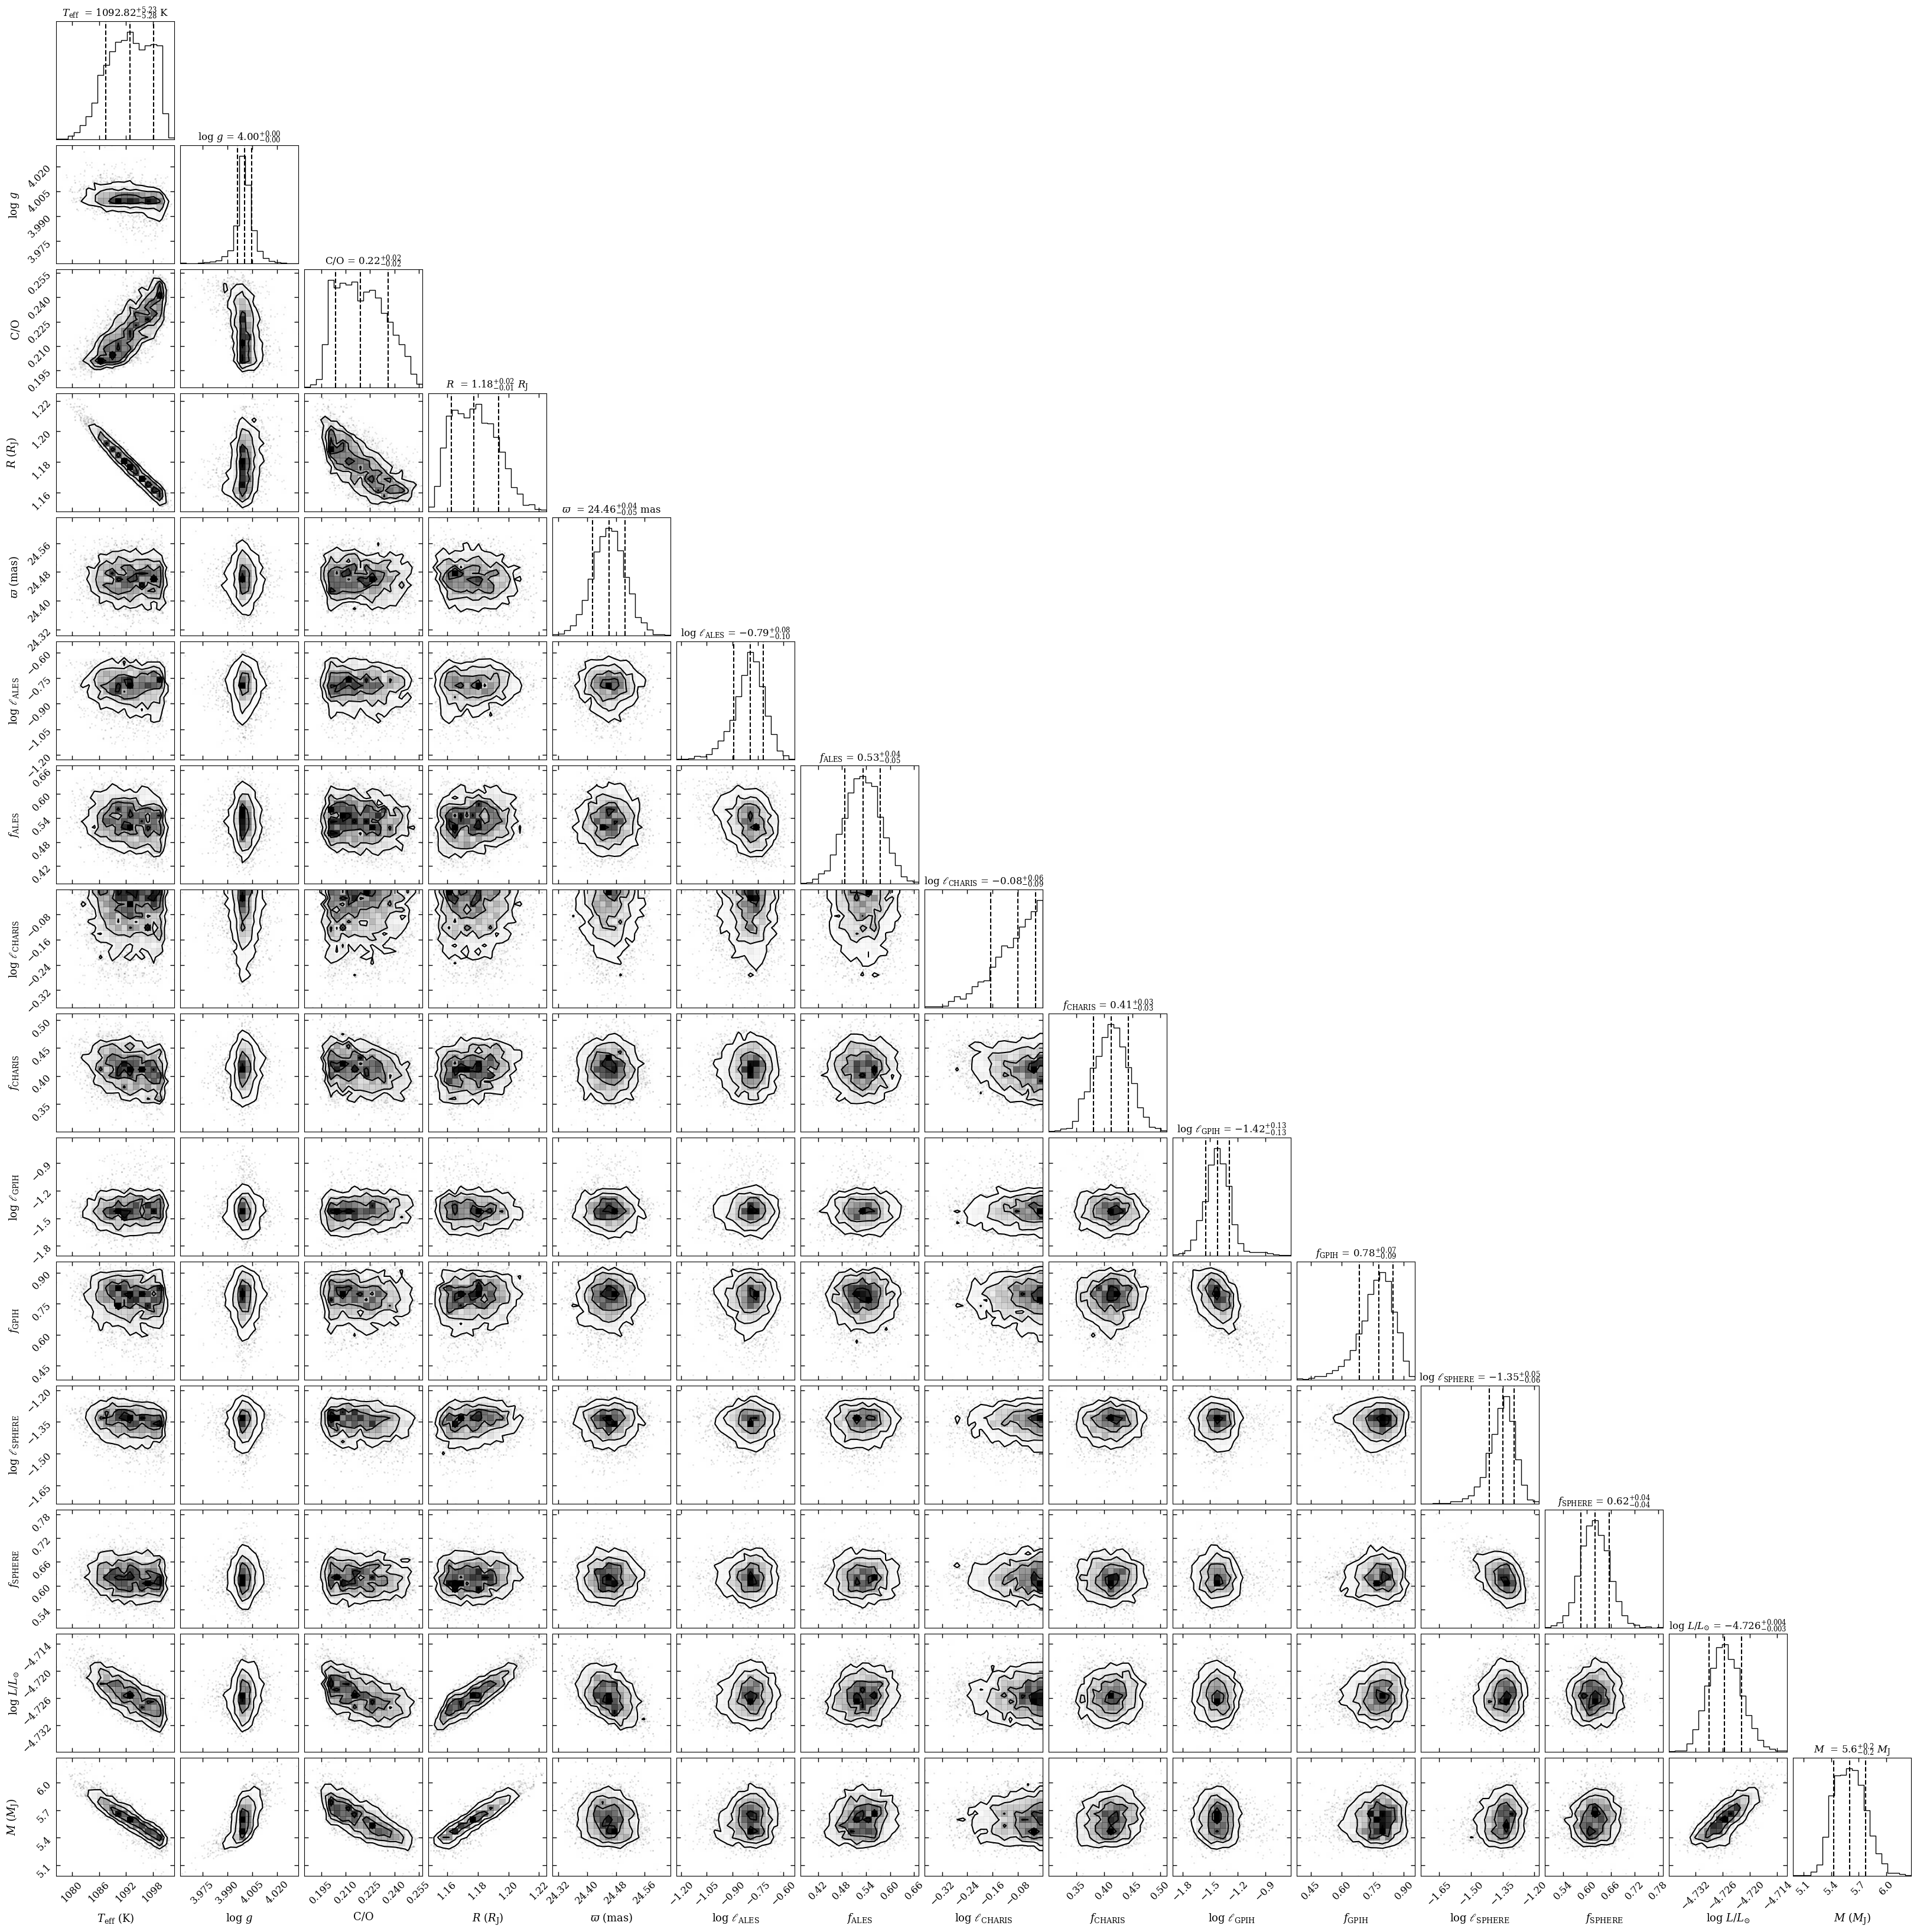

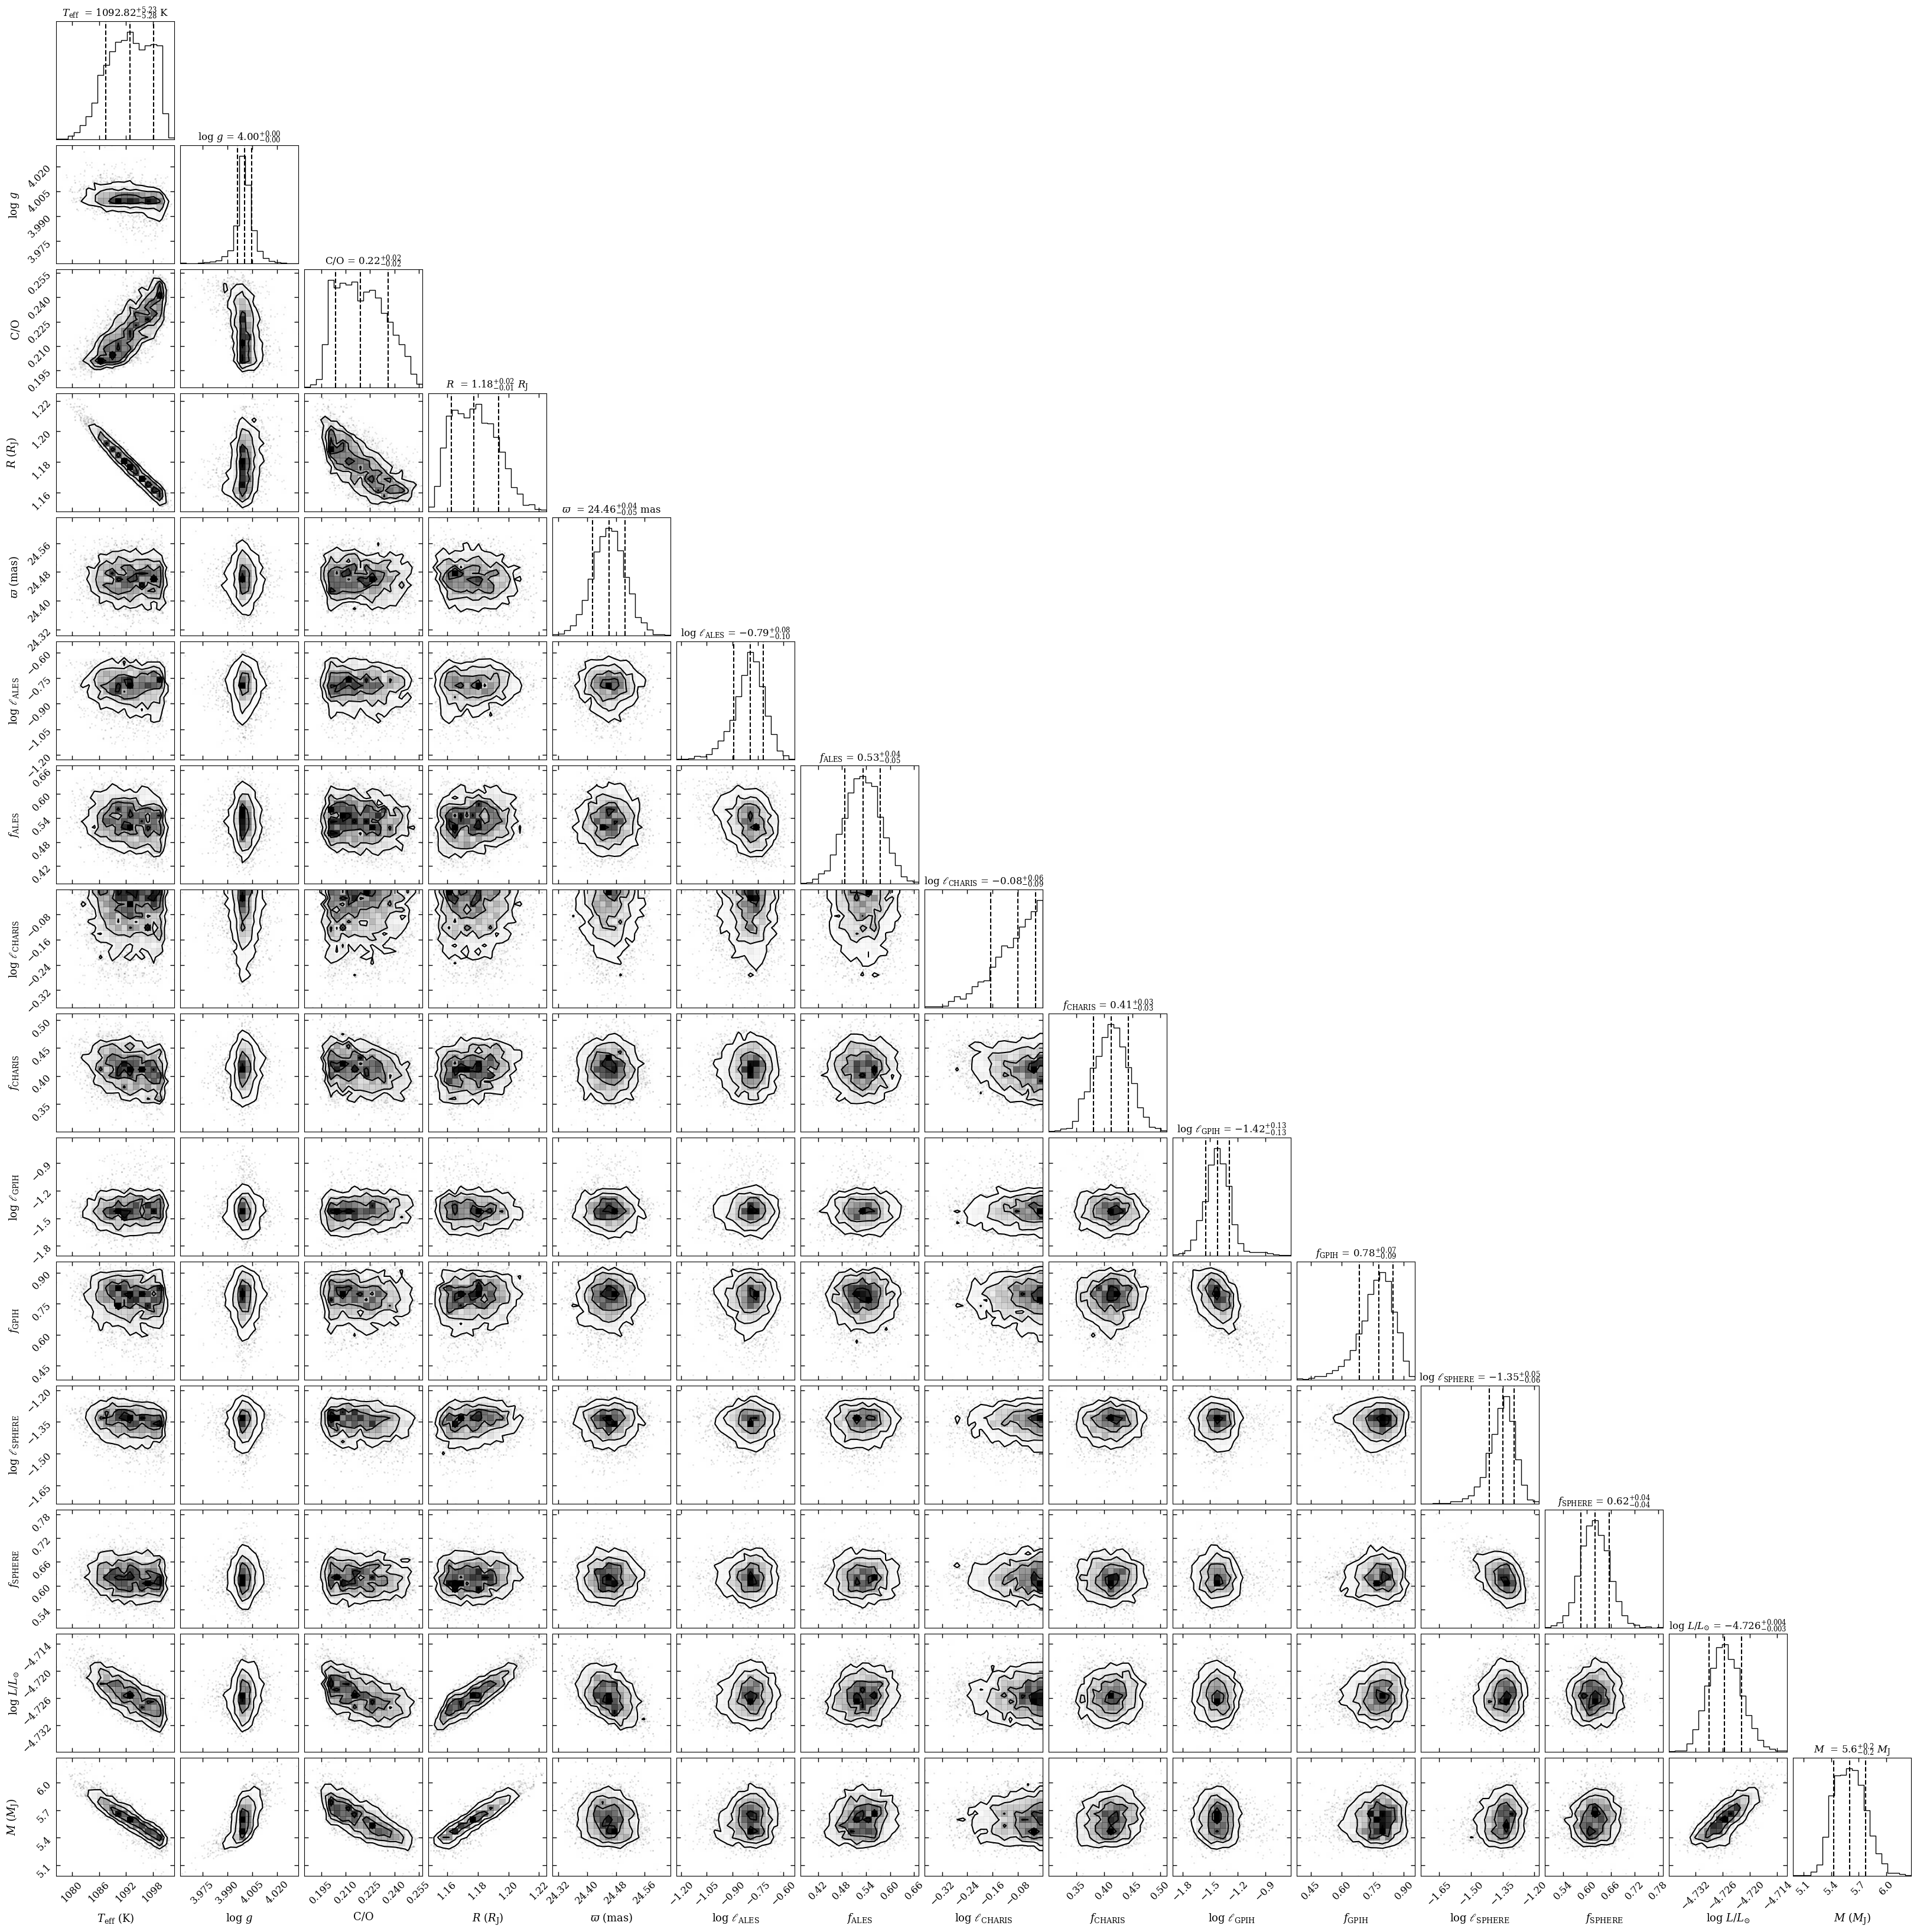

In [23]:
samples = database.get_mcmc_spectra(tag=f'{planet_name}_{current_model}{tag}',
                                    random=60,
                                    wavel_range=None,
                                    spec_res=500.)
species.plot_posterior(tag=f'{planet_name}_{current_model}{tag}',
                       offset=(-0.3 , -0.3),
                       title_fmt=[ '.2f','.2f','.2f','.2f','.2f','.2f','.2f','.2f','.2f','.2f','.2f','.2f','.2f', '.3f', '.1f'],
                       inc_luminosity=True,
                       inc_mass=True,
                       output=f"plots/{planet_name}_{current_model}{tag}_corner")


In [25]:
#best = database.get_median_sample(tag=f'{planet_name}_{current_model}{tag}')
samples = np.genfromtxt(f"multinest/{planet_name}_{current_model}{tag}post_equal_weights.dat")
meds = np.median(samples[:,:-1],axis = 0)
print(meds)
"""best = {}
for i,par in enumerate(fit.modelpar):
    if "corr" in par:continue
    if "scaling" in par:continue
    best[par] = meds[i]"""
best = database.get_median_sample(tag=f"{planet_name}_{current_model}{tag}")
if not current_model == "exo-rem":
    read_model = species.ReadModel(model=current_model,
                                wavel_range=(0.5,18))
    modelbox = read_model.get_model(model_param=best,
                                    spec_res=500,
                                    smooth=True)
    np.savetxt(f"grid_fit_spectra/{planet_name}_{current_model}{tag}_R500_BestFit.dat",np.column_stack([modelbox.wavelength,modelbox.flux]))
    modelbox = read_model.get_model(model_param=best,
                                    spec_res=3500,
                                    smooth=True)
    np.savetxt(f"grid_fit_spectra/{planet_name}_{current_model}{tag}_R3500_BestFit.dat",np.column_stack([modelbox.wavelength,modelbox.flux]))
else:
    read_model = species.ReadModel(model=current_model,
                                wavel_range=(0.5,18))
    modelbox = read_model.get_model(model_param=best,
                                    spec_res=500,
                                    smooth=True)
    np.savetxt(f"grid_fit_spectra/{planet_name}_{current_model}{tag}_R500_BestFit.dat",np.column_stack([modelbox.wavelength,modelbox.flux]))
    read_model = species.ReadModel(model="exo-rem-highres",
                                wavel_range=(0.5,18))
    modelbox = read_model.get_model(model_param=best,
                                    spec_res=3500,
                                    smooth=True)
    np.savetxt(f"grid_fit_spectra/{planet_name}_{current_model}{tag}_R3500_BestFit.dat",np.column_stack([modelbox.wavelength,modelbox.flux]))


[ 1.09282101e+03  4.00032460e+00  2.18913019e-01  1.17757814e+00
  2.44609508e+01 -7.94880514e-01  5.32299121e-01 -7.88671706e-02
  4.12365986e-01 -1.41990265e+00  7.77498086e-01 -1.34786545e+00
  6.20330623e-01]


In [9]:
objectbox = database.get_object(object_name=planet_name,
                                inc_phot=filter_list,
                                inc_spec=True)
objectbox = species.update_spectra(objectbox=objectbox,
                                   model_param=best)
residuals = species.get_residuals(datatype='model',
                                  spectrum=current_model,
                                  parameters=best,
                                  objectbox=objectbox,
                                  inc_phot=filter_list,
                                  inc_spec=True)
synphot = species.multi_photometry(datatype='model',
                                   spectrum=current_model,
                                   filters=filter_list,
                                   parameters=best)
synphot.open_box()


Getting object: HR 8799 e... [DONE]
Calculating synthetic photometry...

/Users/nasedkin/python-packages/species/species/util/read_util.py:176: DeprecationWarning: The update_spectra function is deprecated and will be removed in a future release. Please use the update_objectbox function instead.
  warnings.warn(


 [DONE]
Calculating residuals... [DONE]
Residuals (sigma):
   - JWST/MIRI.F1065C: 1.22
   - JWST/MIRI.F1140C: 0.82
   - JWST/MIRI.F1550C: 2.02
   - Paranal/NACO.Lp: -1.37
   - Paranal/NACO.NB405: 2.06
   - Paranal/SPHERE.IRDIS_B_J: 2.58
   - Paranal/SPHERE.IRDIS_D_H23_2: 1.81
   - Paranal/SPHERE.IRDIS_D_H23_3: 1.26
   - Paranal/SPHERE.IRDIS_D_K12_1: 0.09
   - Paranal/SPHERE.IRDIS_D_K12_2: 1.21
   - ALES: min: -4.75, max: 4.16
   - CHARIS: min: -2.92, max: 2.37
   - GPIH: min: -2.32, max: 3.49
   - GRAVITY: min: -3.59, max: 3.93
   - SPHERE: min: -3.02, max: 5.52
Reduced chi2 = 2.35
Number of degrees of freedom = 416
Calculating synthetic photometry... [DONE]
Opening SynphotBox...
name = synphot
wavelength = {'JWST/MIRI.F1065C': <bound method ReadFilter.mean_wavelength of <species.read.read_filter.ReadFilter object at 0x13d7664a0>>, 'JWST/MIRI.F1140C': <bound method ReadFilter.mean_wavelength of <species.read.read_filter.ReadFilter object at 0x13bb86fe0>>, 'JWST/MIRI.F1550C': <bound met

Plotting spectrum: plots/HR 8799 e_exo-rem_fitcorr_newales_bestfit... [DONE]


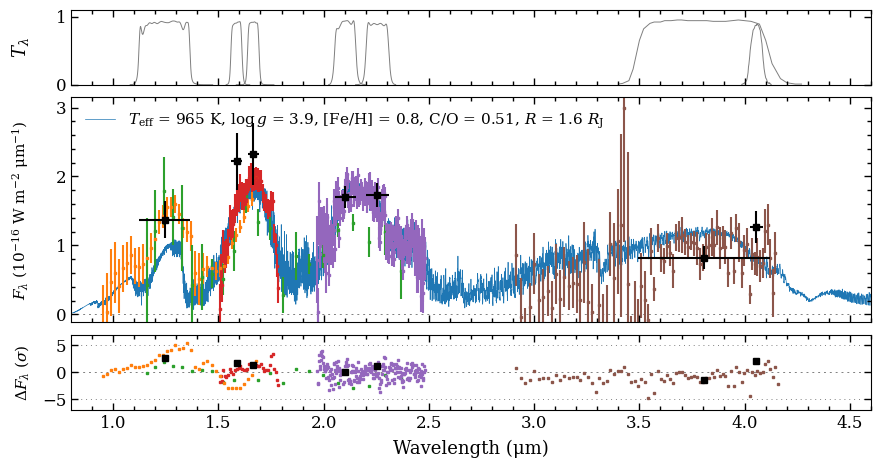

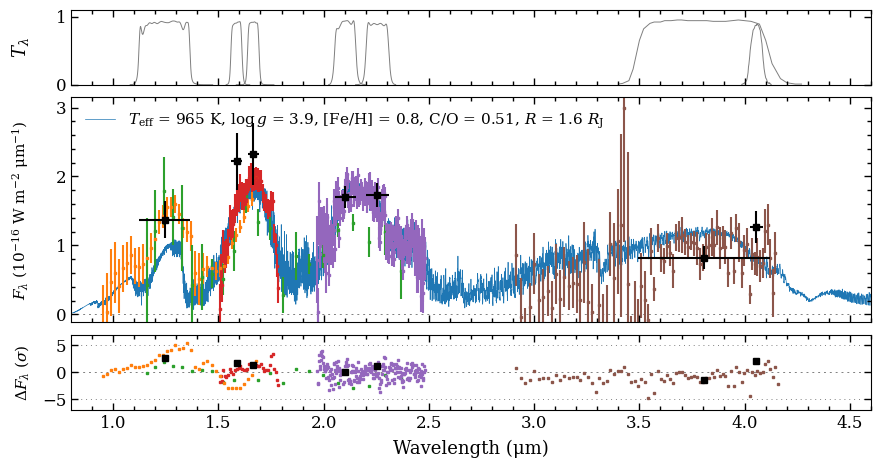

In [10]:
species.plot_spectrum(boxes=[samples, modelbox, objectbox,],
                      filters=objectbox.filters,
                      residuals=residuals,
                      xlim=(0.8, 4.6),
                      ylim=(-1.15e-17, 3.15e-16),
                      ylim_res=(-7., 7.),
                      scale=('linear', 'linear'),
                      offset=(-0.4, -0.05),
                      legend=[{'loc': 'upper left', 'frameon': False, 'fontsize': 11.},
                              {'loc': 'upper right', 'frameon': False, 'fontsize': 12.}],
                      figsize=(8., 4.),
                      quantity='flux density',
                      output=f"plots/{planet_name}_{current_model}{tag}_bestfit")

Plotting spectrum: plots/HR 8799 e_exo-rem_fitcorr_newales_bestfit_fullwaves... [DONE]


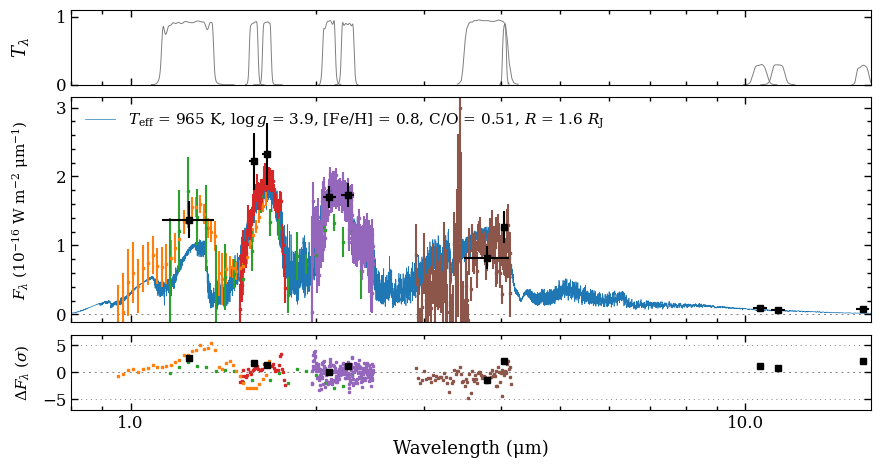

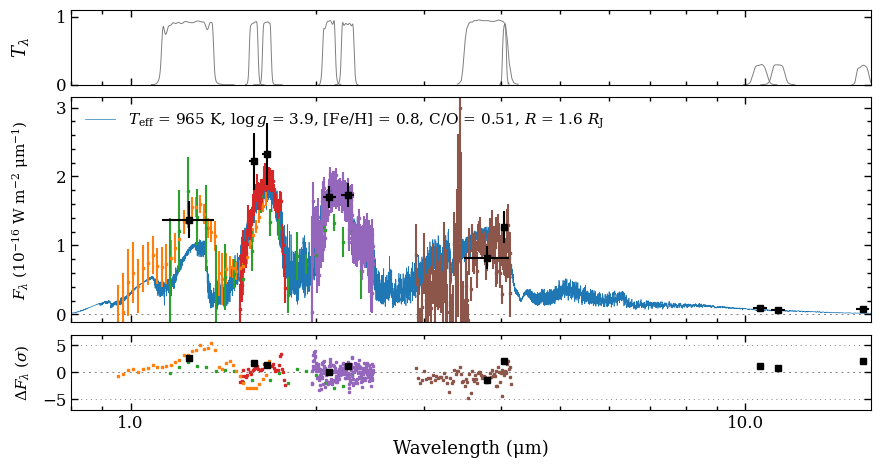

In [11]:
species.plot_spectrum(boxes=[samples, modelbox, objectbox,],
                      filters=objectbox.filters,
                      residuals=residuals,
                      xlim=(0.8, 16),
                      ylim=(-1.15e-17, 3.15e-16),
                      ylim_res=(-7., 7.),
                      scale=('log', 'linear'),
                      offset=(-0.4, -0.05),
                      legend=[{'loc': 'upper left', 'frameon': False, 'fontsize': 11.},
                              {'loc': 'upper right', 'frameon': False, 'fontsize': 12.}],
                      figsize=(8., 4.),
                      quantity='flux density',
                      output=f"plots/{planet_name}_{current_model}{tag}_bestfit_fullwaves")


Getting object: HR 8799 b... [DONE]
Processing model spectrum 3150/3150... [DONE]
Best-fit parameters:
   - Goodness-of-fit = 4.77e+02
   - teff = 1100.0
   - logg = 5.0
   - feh = 0.6
   - c_o_ratio = 0.3
   - ad_index = 1.01
   - Radius (Rjup) = 0.73
   - Scaling = 1.73e-21
   - OSIRIS scaling = 1.62
Plotting goodness-of-fit of model grid: plots/HR 8799 b_petrus2023_fitcorr_grid_statistic.png... [DONE]
Plotting model spectra comparison: plots/HR 8799 b_petrus2023_fitcorr_chi2model_spectra.png...

/Users/nasedkin/python-packages/species/species/util/plot_util.py:866: UserWarning: The model name 'petrus2023' is not known so the output name will not get adjusted for plot purposes
  warnings.warn(


 [DONE]


/Users/nasedkin/python-packages/species/species/read/read_model.py:746: UserWarning: The 'scaling_OSIRIS' parameter is not required by 'petrus2023' so the parameter will be ignored. The mandatory parameters are ['teff', 'logg', 'feh', 'c_o_ratio', 'ad_index'].
  warnings.warn(


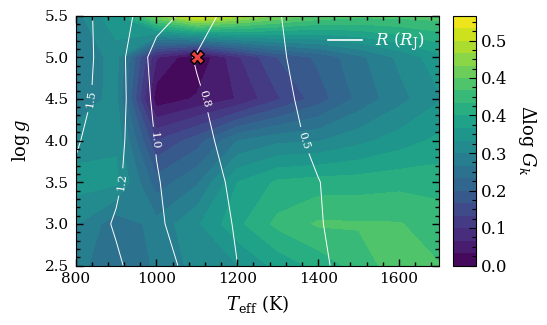

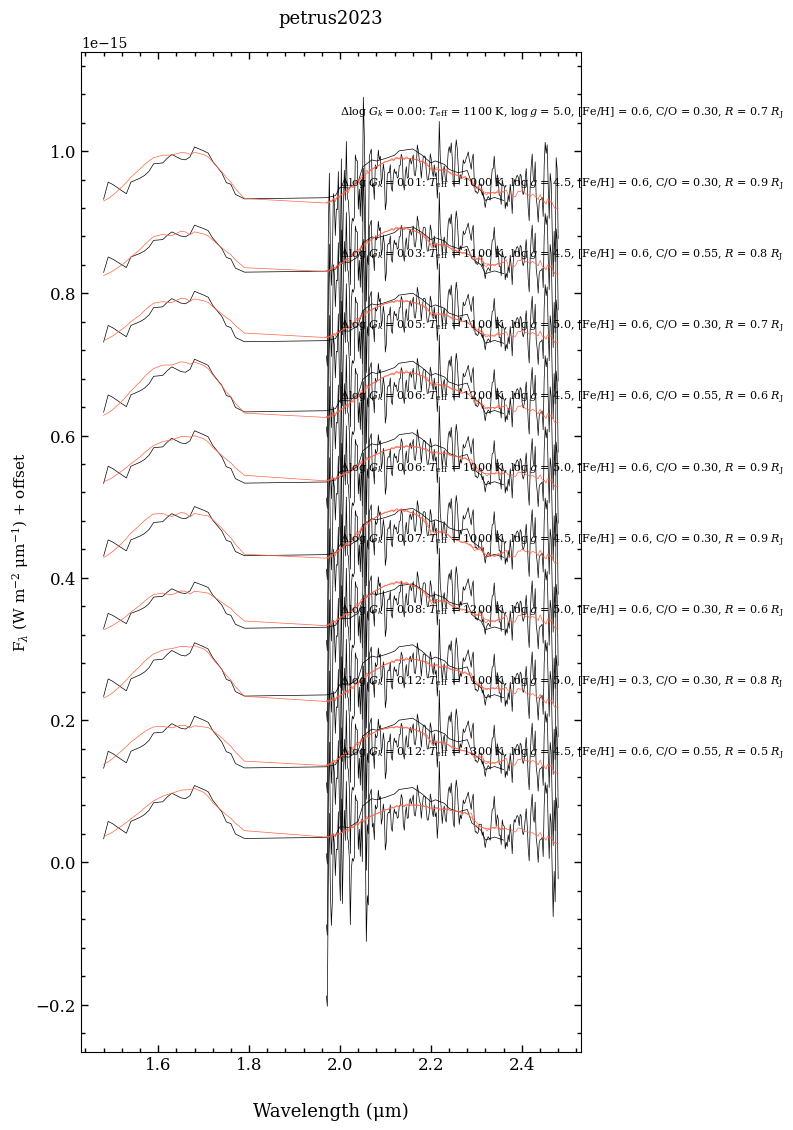

In [8]:
planet_name = "HR 8799 b"
current_model = "petrus2023"
tag = "_fitcorr"

compare = species.CompareSpectra(object_name=planet_name,
                                 spec_name=["GRAVITY","OSIRIS"])
                                 #spec_name=["GRAVITY","SPHERE","GPIH","CHARIS","ALES"])

compare.compare_model(tag=f"{planet_name}_{current_model}{tag}_chi2fit",
                       model=current_model,
                       av_points=None,
                       fix_logg=None,
                       scale_spec=["OSIRIS"],
                       weights=False,
                       inc_phot=True)

species.plot_grid_statistic(tag=f"{planet_name}_{current_model}{tag}_chi2fit",
                            upsample=False,
                            offset=(-0.11, -0.12),
                            output=f'plots/{planet_name}_{current_model}{tag}_grid_statistic.png',
                            extra_param='radius',
                            nlevels_extra=5)

species.plot_model_spectra(tag=f"{planet_name}_{current_model}{tag}_chi2fit",
                           n_spectra=10,
                           flux_offset=1e-16,
                           label_pos=(2., 1.5e-16),
                           xlim=None,
                           ylim=None,
                           title=current_model,
                           offset=(-0.05, -0.1),
                           figsize=(5., 10.),
                           output=f'plots/{planet_name}_{current_model}{tag}_chi2model_spectra.png',
                           leg_param=['teff', 'logg', 'feh', 'c_o_ratio', 'radius'])
best = database.get_compare_sample(f"{planet_name}_{current_model}{tag}_chi2fit")
with open(f"grid_fit_output_arrays/{planet_name}_{current_model}{tag}_bestfit_chi2_params.dat",'w+') as f:
    f.write(f"{planet_name}_{current_model}{tag}\n")
    for key, val in best.items():
        f.write(f"{key}, {val}\n")
if not current_model == "exo-rem":
    read_model = species.ReadModel(model=current_model,
                                wavel_range=(0.5,18))
    modelbox = read_model.get_model(model_param=best,
                                    spec_res=500,
                                    smooth=True)
    np.savetxt(f"grid_fit_spectra/{planet_name}_{current_model}{tag}_R500_BestFitChi2.dat",np.column_stack([modelbox.wavelength,modelbox.flux]))
    modelbox = read_model.get_model(model_param=best,
                                    spec_res=3500,
                                    smooth=True)
    np.savetxt(f"grid_fit_spectra/{planet_name}_{current_model}{tag}_R3500_BestFitChi2.dat",np.column_stack([modelbox.wavelength,modelbox.flux]))
else:
    read_model = species.ReadModel(model=current_model,
                                wavel_range=(0.5,18))
    modelbox = read_model.get_model(model_param=best,
                                    spec_res=500,
                                    smooth=True)
    np.savetxt(f"grid_fit_spectra/{planet_name}_{current_model}{tag}_R500_BestFitChi2.dat",np.column_stack([modelbox.wavelength,modelbox.flux]))
    read_model = species.ReadModel(model="exo-rem-highres",
                                wavel_range=(0.5,18))
    modelbox = read_model.get_model(model_param=best,
                                    spec_res=3500,
                                    smooth=True)
    np.savetxt(f"grid_fit_spectra/{planet_name}_{current_model}{tag}_R3500_BestFitChi2.dat",np.column_stack([modelbox.wavelength,modelbox.flux]))


In [11]:
import configparser
import h5py
config_file = os.path.join(os.getcwd(), "species_config.ini")

config = configparser.ConfigParser()
config.read(config_file)



db_path = config["species"]["database"]
h5_file = h5py.File(db_path, "r")
tag = '_fitcorr_new_ales'
for planet in ["HR 8799 e", "HR 8799 d", "HR 8799 c", "HR 8799 b"]:
    tag = '_fitcorr_newales'
    if planet == "HR 8799 d":
        tag = '_fitcorr_newales_scaled'
    if planet == "HR 8799 b":
        tag = '_fitcorr'
    for model in ["petrus2023", "diamondback", "exo-rem", "petitcode-hot-cloudy", "petitcode-cool-cloudy"]:
        if model == "petitcode-hot-cloudy" and planet == "HR 8799 b":
            continue
        if model == "petitcode-cool-cloudy" and planet != "HR 8799 b":
            continue   
        if planet == "HR 8799 d" and model == 'diamondback':
            tag = '_fitcorr_newales'
        if planet == "HR 8799 d" and model == 'petitcode-hot-cloudy':
            tag = '_fitcorr_newales_scaleales'
        try:
            #best = database.get_compare_sample(f"{planet}_{model}{tag}_chi2fit")
            #npar = len(list(best.keys()))
            dset = h5_file[f"results/comparison/{planet}_{model}{tag}_chi2fit/goodness_of_fit"]
            dset = np.array(dset)
            print(planet,model,np.nanmin(dset))
            np.save(f"grid_fit_output_arrays/{planet}_{model}{tag}_chi2fitdset_v2",dset)
        except:
            continue

#dset = h5_file[f"results/comparison/{planet_name}_{current_model}{tag}_chi2fit/goodness_of_fit"]
#dset = np.array(dset)
#np.save(f"grid_fit_output_arrays/{planet_name}_{current_model}{tag}_chi2fitdset",dset)
h5_file.close()
# Only available w pRT retrievals
#try:
#    database.get_pt_profiles(tag = f"{planet_name}_{current_model}{tag}_chi2fit",
#                            out_file=f"grid_fit_output_arrays/{planet_name}_{current_model}{tag}_chi2_PTProf.fits")
#except KeyError:
#    print("No Samples Found")

HR 8799 e petrus2023 794.8726363717184
HR 8799 e diamondback 1002.9764642308571
HR 8799 e exo-rem 796.2908807314777
HR 8799 e petitcode-hot-cloudy 1336.530137893416
HR 8799 d petrus2023 807.047382283635
HR 8799 d diamondback 911.6251464322131
HR 8799 d petitcode-hot-cloudy 1031.3960887197409
HR 8799 c petrus2023 1231.906316621244
HR 8799 c diamondback 1988.0512095028882
HR 8799 c exo-rem 1472.6018229348829
HR 8799 c petitcode-hot-cloudy 3007.699000688731
HR 8799 b petrus2023 477.12784981751076
HR 8799 b diamondback 564.5661087505445
HR 8799 b exo-rem 360.39891890973024
HR 8799 b petitcode-cool-cloudy 585.2966780766449


In [10]:
dat = np.load("grid_fit_output_arrays/HR 8799 d_petitcode-hot-cloudy_fitcorr_newales_scaled_chi2fitdset.npy")
print(np.nanmin(dat))

FileNotFoundError: [Errno 2] No such file or directory: 'grid_fit_output_arrays/HR 8799 d_petitcode-hot-cloudy_fitcorr_newales_scaled_chi2fitdset.npy'

In [3]:
planet_name = "HR 8799 c"
current_model = "exo-rem"
tag = "_fitcorr_newales"
best = database.get_compare_sample(f"{planet_name}_{current_model}{tag}_chi2fit")
with open(f"grid_fit_output_arrays/{planet_name}_{current_model}{tag}_bestfit_chi2_params.dat",'w+') as f:
    f.write(f"{planet_name}_{current_model}{tag}\n")
    for key, val in best.items():
        f.write(f"{key}, {val}\n")